In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the ResNet-50 model
def resnet50_model(input_shape=(32, 32, 3), num_classes=10):
    input_tensor = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Define residual blocks
    x = residual_block(x, filters=[64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = residual_block(x, filters=[64, 64, 256], stage=2, block='b')
    x = residual_block(x, filters=[64, 64, 256], stage=2, block='c')

    x = residual_block(x, filters=[128, 128, 512], stage=3, block='a', strides=(2, 2))
    x = residual_block(x, filters=[128, 128, 512], stage=3, block='b')
    x = residual_block(x, filters=[128, 128, 512], stage=3, block='c')
    x = residual_block(x, filters=[128, 128, 512], stage=3, block='d')

    x = residual_block(x, filters=[256, 256, 1024], stage=4, block='a', strides=(2, 2))
    x = residual_block(x, filters=[256, 256, 1024], stage=4, block='b')
    x = residual_block(x, filters=[256, 256, 1024], stage=4, block='c')
    x = residual_block(x, filters=[256, 256, 1024], stage=4, block='d')
    x = residual_block(x, filters=[256, 256, 1024], stage=4, block='e')
    x = residual_block(x, filters=[256, 256, 1024], stage=4, block='f')

    x = residual_block(x, filters=[512, 512, 2048], stage=5, block='a', strides=(2, 2))
    x = residual_block(x, filters=[512, 512, 2048], stage=5, block='b')
    x = residual_block(x, filters=[512, 512, 2048], stage=5, block='c')

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=x, name='resnet50')

    return model

def residual_block(x, filters, stage, block, strides=(2, 2)):
    conv_name_base = f'res{stage}{block}_branch'
    bn_name_base = f'bn{stage}{block}_branch'

    shortcut = x

    # First component
    x = layers.Conv2D(filters[0], (1, 1), strides=strides, name=conv_name_base + '2a')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    # Second component
    x = layers.Conv2D(filters[1], (3, 3), padding='same', name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    # Third component
    x = layers.Conv2D(filters[2], (1, 1), name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2c')(x)

    # Shortcut path
    shortcut = layers.Conv2D(filters[2], (1, 1), strides=strides, name=conv_name_base + '1')(shortcut)
    shortcut = layers.BatchNormalization(name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

# Create and compile the ResNet-50 model
model = resnet50_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (You should replace this with your own dataset and training code)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 140s 55ms/step - loss: 2.3672 - accuracy: 0.1878 - val_loss: 2.2120 - val_accuracy: 0.1639
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 2.1775 - accuracy: 0.2373 - val_loss: 1.9341 - val_accuracy: 0.2989
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.1224 - accuracy: 0.2409 - val_loss: 1.8901 - val_accuracy: 0.2844
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 2.0538 - accuracy: 0.2699 - val_loss: 2.2984 - val_accuracy: 0.2695
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.2596 - accuracy: 0.1946 - val_loss: 2.3454 - val_accuracy: 0.1496
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 2.2584 - accuracy: 0.1726 - val_loss: 2.0767 - val_accuracy: 0.2057
Epoch 7/10
1563/1563 [==============================] - 

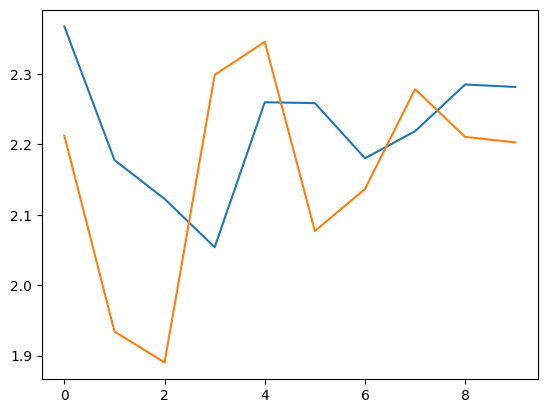

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])